# 分类回归树
## 分类树—鸢尾花数据决策树分类

In [2]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import pandas as pd
# 准备数据集
iris=load_iris()
# 获取特征集和分类标识
features = iris.data
labels = iris.target

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:

# 随机抽取33%的数据作为测试集，其余为训练集
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=0)
# 创建CART分类树
clf = DecisionTreeClassifier(criterion='gini')
# 拟合构造CART分类树
clf = clf.fit(train_features, train_labels)
# 用CART分类树做预测
test_predict = clf.predict(test_features)
# 预测结果与测试集结果作比对
score = accuracy_score(test_labels, test_predict)
print("CART分类树准确率 %.4lf" % score)

CART分类树准确率 0.9600


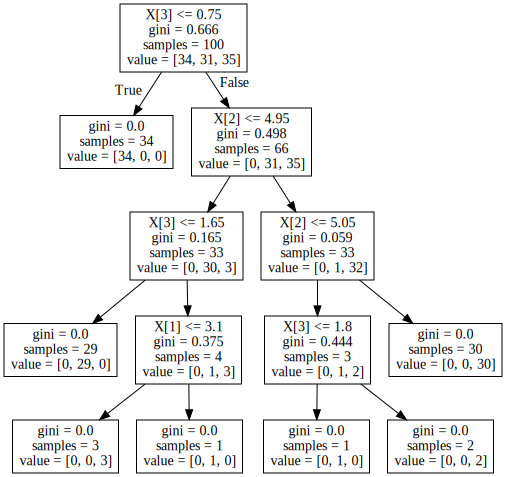

In [4]:
dot_data = tree.export_graphviz(clf,out_file=None)
graph= graphviz.Source(dot_data)
graph

## 回归树 

In [9]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
# 准备数据集
boston=load_boston()
# 探索数据
print(boston.feature_names)
# 获取特征集和房价
features = boston.data
prices = boston.target
# 随机抽取33%的数据作为测试集，其余为训练集
train_features, test_features, train_price, test_price = train_test_split(features, prices, test_size=0.33)
# 创建CART回归树
dtr=DecisionTreeRegressor()
# 拟合构造CART回归树
dtr.fit(train_features, train_price)
# 预测测试集中的房价
predict_price = dtr.predict(test_features)
# 测试集的结果评价
print('回归树二乘偏差均值:', mean_squared_error(test_price, predict_price))
print('回归树绝对值偏差均值:', mean_absolute_error(test_price, predict_price)) 

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
回归树二乘偏差均值: 26.261257485029937
回归树绝对值偏差均值: 3.0293413173652692


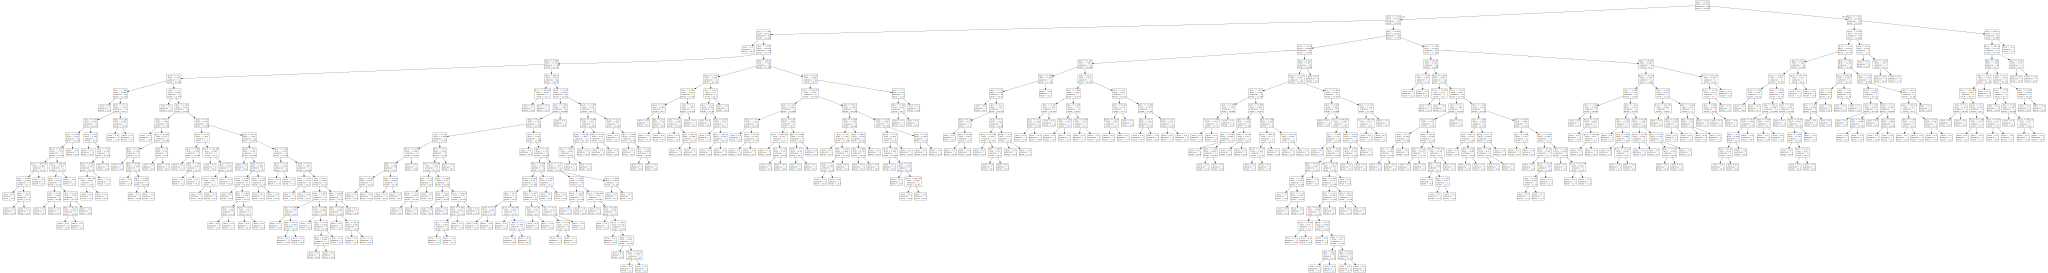

In [10]:
dtr=dtr.fit(train_features, train_price)
dot_data = tree.export_graphviz(dtr,out_file=None)
graph= graphviz.Source(dot_data)
graph